In [182]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws
ws.filterwarnings('ignore')
%matplotlib inline

In [183]:
# loading the data and getting the number of samples and features
df = pd.read_csv("C:/Users/Ashutosh19/Desktop/Cancer_data.csv")
print(df.shape)
df.head(5)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [184]:
# dropping the columns which are irrelevant to the analysis
df = df.drop(columns=['id', 'Unnamed: 32'])

In [185]:
# unique values of the target variable - diagnosis
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [186]:
# it's a binary classification problems

In [187]:
# converting the class labels to numbers: 0 and 1
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M':1})
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
416,0,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.01257,0.2025,...,10.85,31.24,68.73,359.4,0.1526,0.1193,0.06141,0.03770,0.2872,0.08304
368,1,21.710,17.25,140.90,1546.0,0.09384,0.08562,0.11680,0.08465,0.1717,...,30.75,26.44,199.50,3143.0,0.1363,0.1628,0.28610,0.18200,0.2510,0.06494
134,1,18.450,21.91,120.20,1075.0,0.09430,0.09709,0.11530,0.06847,0.1692,...,22.52,31.39,145.60,1590.0,0.1465,0.2275,0.39650,0.13790,0.3109,0.07610
237,1,20.480,21.46,132.50,1306.0,0.08355,0.08348,0.09042,0.06022,0.1467,...,24.22,26.17,161.70,1750.0,0.1228,0.2311,0.31580,0.14450,0.2238,0.07127
447,0,14.800,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,0.1893,...,16.43,22.74,105.90,829.5,0.1226,0.1881,0.20600,0.08308,0.3600,0.07285


In [188]:
# data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [189]:
# numerical analysis of the data
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


0    357
1    212
Name: diagnosis, dtype: int64


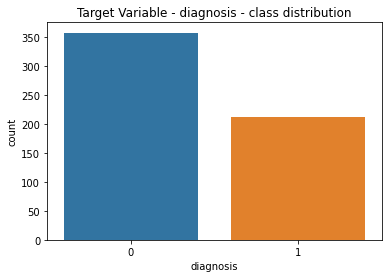

In [190]:
# getting the class distribution of the target variable
print(df['diagnosis'].value_counts())
sns.countplot(x=df['diagnosis'])
plt.title("Target Variable - diagnosis - class distribution")
plt.show()

In [191]:
# getting the correlation of the independent features with the target variable
correlation_with_target = df.corr()['diagnosis'].sort_values(ascending=False)
print(correlation_with_target)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [192]:
# dropping the variables with low correlation with the target variable ( < += .25) 
df = df.drop(columns=["fractal_dimension_se",'symmetry_se',"texture_se","fractal_dimension_mean",'smoothness_se'])

In [193]:
# at this stage the number of samples and features in the data
print(df.shape)
df.head()

(569, 26)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [194]:
### Finding highly multi-correlated independent features to reduce multicollinearity in the dataset 

# getting the correlation matrix
corr_matrix = df.corr()

In [195]:
# accessing the upper triangle of the corr_ matrix
upper = corr_matrix.where(pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(bool))

# this is how it looks
upper

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,NaN,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,NaN,NaN,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,NaN,NaN,NaN,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,NaN,NaN,NaN,NaN,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,NaN,NaN,NaN,NaN,NaN,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [196]:
# getting the input features with correlation more than 0.9 and storing it to a list 
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# showing the number of features that can be dropped and their names
print(len(to_drop), "\n", to_drop) 

10 
 ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


In [197]:
# dropping the highly multi-correlated input features
df = df.drop(columns=to_drop)

# number of samples and features at this stage
print(df.shape)
df.head(2)

(569, 16)


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,radius_se,compactness_se,concavity_se,concave points_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.2419,1.0950,0.04904,0.05373,0.01587,0.1622,0.6656,0.7119,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.5435,0.01308,0.01860,0.01340,0.1238,0.1866,0.2416,0.2750,0.08902


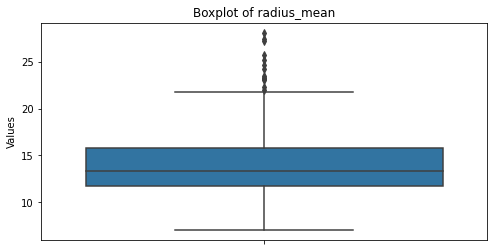

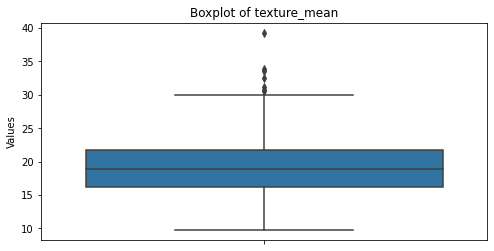

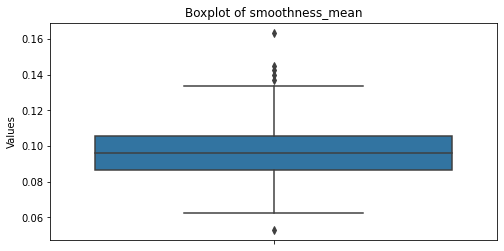

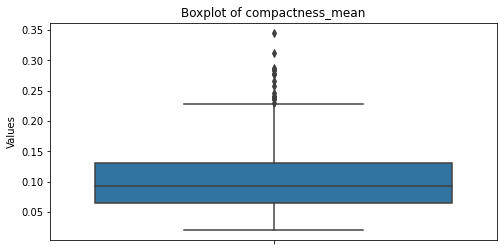

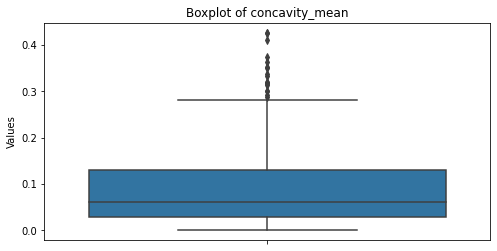

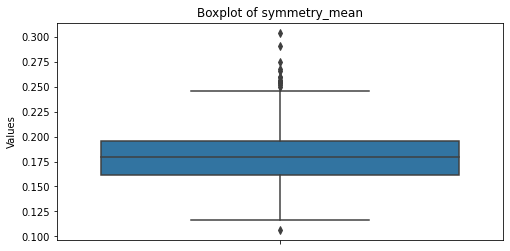

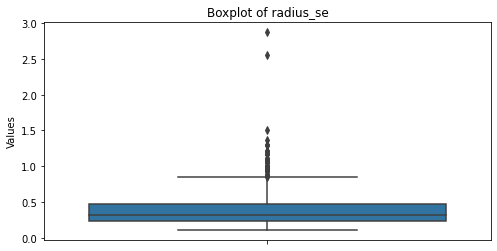

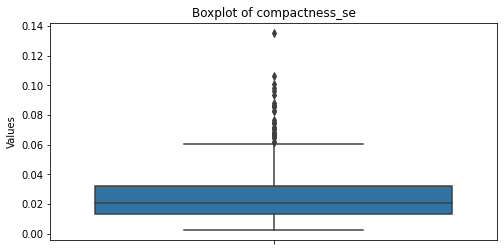

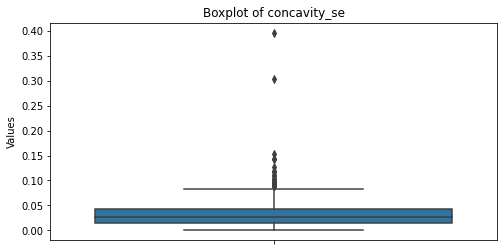

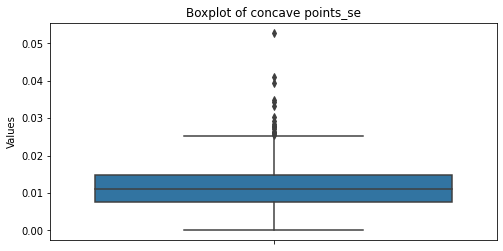

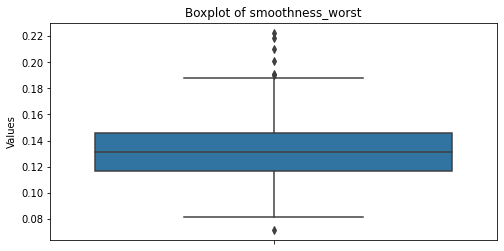

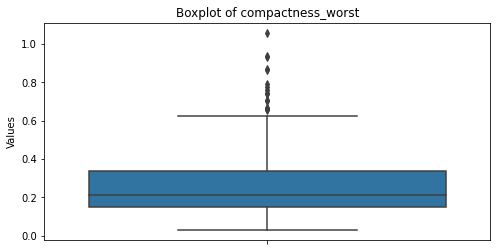

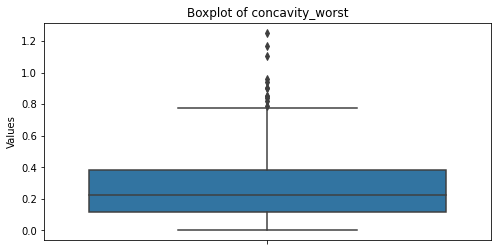

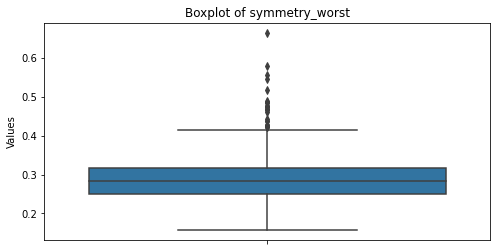

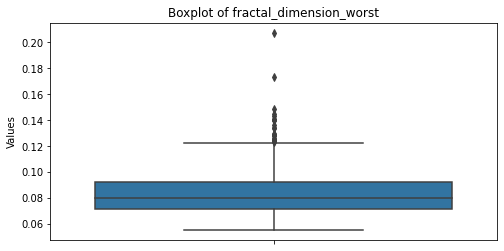

In [198]:
### Outlier detection of all the independent numerical columns

### as many independent features are there, so this is a function to draw box plots
def plot_boxplots(df, exclude_column):
    '''input the df, and the name of the target column'''
    
    # getting the numerical columns except the categorical
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    
    if exclude_column in num_cols:
        num_cols.remove(exclude_column)
    
    # plotting each numerical column separately
    for col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot of {col}")
        plt.ylabel("Values")
        plt.show()

# plugging in the inputs to the function and getting the boxplots
plot_boxplots(df, "diagnosis")


In [199]:
## from observation it is clear that many features are having outliers

In [200]:
# a function to remove outliers in each of the columns using Inter Quartile Range method

def remove_outliers_iqr(df):
    """Input the entire dataframe and returns the updated df"""
    
    Q1 = df.quantile(0.25)  
    Q3 = df.quantile(0.75) 
    IQR = Q3 - Q1 
    
    # the upper and lower boundary
    lbd = Q1 - 1.5 * IQR
    ubd = Q3 + 1.5 * IQR
    
    # returning the filtered df
    return df[(df >= lbd) & (df <= ubd)].dropna()

In [201]:
# numerical analysis and range of values before applying outlier removal
df.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,radius_se,compactness_se,concavity_se,concave points_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,0.096360,0.104341,0.088799,0.181162,0.405172,0.025478,0.031894,0.011796,0.132369,0.254265,0.272188,0.290076,0.083946
std,0.483918,3.524049,4.301036,0.014064,0.052813,0.079720,0.027414,0.277313,0.017908,0.030186,0.006170,0.022832,0.157336,0.208624,0.061867,0.018061
min,0.000000,6.981000,9.710000,0.052630,0.019380,0.000000,0.106000,0.111500,0.002252,0.000000,0.000000,0.071170,0.027290,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,0.086370,0.064920,0.029560,0.161900,0.232400,0.013080,0.015090,0.007638,0.116600,0.147200,0.114500,0.250400,0.071460
50%,0.000000,13.370000,18.840000,0.095870,0.092630,0.061540,0.179200,0.324200,0.020450,0.025890,0.010930,0.131300,0.211900,0.226700,0.282200,0.080040
75%,1.000000,15.780000,21.800000,0.105300,0.130400,0.130700,0.195700,0.478900,0.032450,0.042050,0.014710,0.146000,0.339100,0.382900,0.317900,0.092080
max,1.000000,28.110000,39.280000,0.163400,0.345400,0.426800,0.304000,2.873000,0.135400,0.396000,0.052790,0.222600,1.058000,1.252000,0.663800,0.207500


In [202]:
# applying outlier romoval to the numerical columns
df = remove_outliers_iqr(df) 

# this is the updated dataframe
df.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,radius_se,compactness_se,concavity_se,concave points_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,0.286334,13.633328,18.739154,0.094372,0.089829,0.066760,0.175751,0.340345,0.020784,0.024925,0.010352,0.129702,0.215579,0.220022,0.279721,0.080016
std,0.452539,2.897402,3.956414,0.012565,0.037474,0.055576,0.021961,0.164290,0.011374,0.015606,0.004408,0.020478,0.110258,0.153673,0.044247,0.012536
min,0.000000,6.981000,9.710000,0.062510,0.019380,0.000000,0.116700,0.114400,0.002252,0.000000,0.000000,0.081250,0.034320,0.000000,0.171200,0.055210
25%,0.000000,11.670000,15.860000,0.084910,0.060310,0.026020,0.159800,0.220800,0.012280,0.013670,0.007039,0.114300,0.135700,0.103900,0.247500,0.070530
50%,0.000000,13.050000,18.350000,0.094230,0.082590,0.048240,0.174300,0.295000,0.018000,0.021170,0.010040,0.129700,0.194300,0.188200,0.276200,0.078200
75%,1.000000,14.990000,21.260000,0.103000,0.113300,0.096570,0.191700,0.416500,0.027150,0.033910,0.013150,0.142800,0.279100,0.320600,0.307700,0.087560
max,1.000000,21.610000,29.970000,0.133500,0.228400,0.281000,0.245900,0.842600,0.060630,0.081580,0.022950,0.187800,0.611000,0.772700,0.412800,0.120500


In [203]:
# size of the data at this stage
df.shape

(461, 16)

0    329
1    132
Name: diagnosis, dtype: int64


<AxesSubplot:ylabel='diagnosis'>

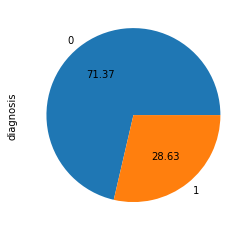

In [204]:
# getting the class balance distribution of target variable
print(df['diagnosis'].value_counts())
df['diagnosis'].value_counts().plot(kind='pie',autopct="%.2f")

In [205]:
# upto this, the cleaned df is ready, so storing it to a df_backup for future reference
df_backup = df

In [206]:
# now balancong out the class imbalance

In [207]:
# frequency of each class
class_counts = df['diagnosis'].value_counts()
print(class_counts)


0    329
1    132
Name: diagnosis, dtype: int64


In [208]:
# counts 
minority = class_counts.idxmin() 
majority = class_counts.idxmax() 
print(minority, majority)

1 0


In [209]:
# separating the majority and minority class datapoints
df_minority = df[df['diagnosis'] == minority]
df_majority = df[df['diagnosis'] == majority]


In [210]:
# now, getting the number of samples having the minority class
len(df_minority)

132

In [211]:
# downsampling the majority class to match minority class count i.e. 132
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

In [212]:
# now constructing the dataframe back to combined data 
df_balanced = pd.concat([df_minority, df_majority_downsampled])

In [213]:
# shuffling the dataset to randomize and mix the classes and storing in "dfb" dataframe [b as in balanced]
dfb = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [214]:
# class balancing done

1    132
0    132
Name: diagnosis, dtype: int64


<AxesSubplot:ylabel='diagnosis'>

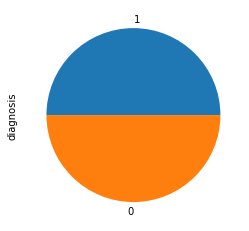

In [215]:
# checking the class distribution after balancing
print(dfb['diagnosis'].value_counts())
dfb['diagnosis'].value_counts().plot(kind='pie')

In [216]:
# size of the data after class balancing
dfb.shape

(264, 16)

In [217]:
# numerical overview
dfb.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,radius_se,compactness_se,concavity_se,concave points_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,264.00000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.50000,14.581538,19.510038,0.095945,0.099374,0.086520,0.178502,0.394962,0.022502,0.027953,0.011239,0.133294,0.244259,0.269845,0.287263,0.081592
std,0.50095,3.222995,3.728177,0.012317,0.040801,0.063234,0.022158,0.181817,0.011857,0.015976,0.004476,0.020743,0.122404,0.169474,0.045210,0.013198
min,0.00000,7.729000,10.890000,0.062510,0.019380,0.000000,0.116700,0.114400,0.002252,0.000000,0.000000,0.081250,0.034320,0.000000,0.178300,0.055210
25%,0.00000,12.060000,16.980000,0.086765,0.066608,0.033708,0.161900,0.251275,0.013750,0.016172,0.008032,0.118825,0.151600,0.128550,0.254525,0.072295
50%,0.50000,14.005000,19.540000,0.096215,0.097550,0.078980,0.178600,0.339700,0.020295,0.026640,0.011390,0.133750,0.226000,0.263350,0.283150,0.079740
75%,1.00000,17.052500,21.840000,0.103900,0.128325,0.127350,0.193200,0.510375,0.030035,0.038812,0.014257,0.146325,0.331450,0.389450,0.316975,0.090145
max,1.00000,21.610000,29.810000,0.133500,0.228400,0.281000,0.245900,0.842600,0.060500,0.081580,0.022150,0.187800,0.611000,0.772700,0.404500,0.120500


In [218]:
# dividing the data into independent and dependent format, X and y
X = dfb.drop(columns=['diagnosis'])
y = dfb['diagnosis']

X.head(2)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,radius_se,compactness_se,concavity_se,concave points_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.01,20.26,0.08772,0.07304,0.06950,0.2026,0.5858,0.01503,0.01946,0.01123,0.1111,0.1486,0.19320,0.3275,0.06469
1,10.26,14.71,0.09882,0.09159,0.03581,0.1633,0.3380,0.04671,0.02611,0.01296,0.1360,0.1636,0.07162,0.2434,0.08488


In [219]:
y.sample(5)

135    1
31     1
224    1
254    0
137    1
Name: diagnosis, dtype: int64

In [220]:
# importing tsp and feature scaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [221]:
# data Scaling is essential to apply linear model for better model performance
scaler = StandardScaler()

# scaling the train and test data
X_train_scaled = scaler.fit_transform(X_train) 

X_test_scaled = scaler.transform(X_test)  

In [222]:
# number of samples for training and testing
print(len(X_train_scaled), len(X_test_scaled))

211 53


In [223]:
# importing the classification Log. Regg, RF and XGb models and accuracy metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [224]:
# a function to train and test the model performance
def evaluate_models(X_train, y_train, X_test, y_test):
    """Inputs are the train and test data, trains 3 models and outputs model performances"""
 
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier()}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print(f"\n{name}:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
        print(f"Precision: {precision_score(y_test, y_pred):.3f}")
        print(f"Recall: {recall_score(y_test, y_pred):.3f}")
        print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")

In [225]:
# First - training and testing on Balanced Data
evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test)


Logistic Regression:
Accuracy: 0.962
Precision: 0.917
Recall: 1.000
F1 Score: 0.957

Random Forest:
Accuracy: 0.962
Precision: 0.917
Recall: 1.000
F1 Score: 0.957

XGBoost:
Accuracy: 0.962
Precision: 0.917
Recall: 1.000
F1 Score: 0.957


In [226]:
#####
#####

In [227]:
# Second - training and testing on the entire dataset

In [228]:
# Dividing the original data into X and y from the df_backup dataframe
X = df_backup.drop(columns=['diagnosis'])
y = df_backup['diagnosis']

In [229]:
# Splitting and scaling the data for logistic regression - "f" as in full data
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled_f = scaler.fit_transform(X_trainf)

X_test_scaled_f = scaler.transform(X_testf) 

In [230]:
print(len(X_train_scaled_f), len(X_test_scaled_f))

368 93


In [231]:
### a function to train and test with updated model param - class_weight ='balanced' 

def evaluate_models_on_full_data(X_train, y_train, X_test, y_test):
    # setting for XGB 
    pos_class_weight = (len(y_train) - np.sum(y_train)) / np.sum(y_train)

    models = {
        'Logistic Regression': LogisticRegression(class_weight='balanced'),
        'Random Forest': RandomForestClassifier(class_weight='balanced'),
        'XGBoost': XGBClassifier(objective='binary:logistic', scale_pos_weight=pos_class_weight)}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print(f"\n{name}:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
        print(f"Precision: {precision_score(y_test, y_pred):.3f}")
        print(f"Recall: {recall_score(y_test, y_pred):.3f}")
        print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")

In [232]:
# evaluation
evaluate_models_on_full_data(X_train_scaled_f, y_trainf, X_test_scaled_f, y_testf)


Logistic Regression:
Accuracy: 0.968
Precision: 0.931
Recall: 0.964
F1 Score: 0.947

Random Forest:
Accuracy: 0.914
Precision: 0.917
Recall: 0.786
F1 Score: 0.846

XGBoost:
Accuracy: 0.946
Precision: 0.897
Recall: 0.929
F1 Score: 0.912


In [233]:
#### Now performing Feature selection using selectkbest algo

In [234]:
from sklearn.feature_selection import SelectKBest, f_classif

# selecting top 10 best features
X = dfb.drop(columns=['diagnosis'])
y = dfb['diagnosis']

# fitting the data into the feature selection model, k = 10 
best_features = SelectKBest(score_func =  f_classif, k =10)
X_selected = best_features.fit_transform(X, y)

In [235]:
# printing the variable scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': best_features.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)


                    Feature       Score
0               radius_mean  357.002071
4            concavity_mean  296.746600
12          concavity_worst  234.476624
6                 radius_se  153.797750
3          compactness_mean  139.464088
11        compactness_worst  125.832293
9         concave points_se   78.075928
1              texture_mean   57.473328
10         smoothness_worst   56.383231
13           symmetry_worst   48.524296
8              concavity_se   45.747106
2           smoothness_mean   34.900193
5             symmetry_mean   24.696611
14  fractal_dimension_worst   24.086116
7            compactness_se   19.771219


In [236]:
X_selected

array([[17.01   , 20.26   ,  0.07304, ...,  0.1486 ,  0.1932 ,  0.3275 ],
       [10.26   , 14.71   ,  0.09159, ...,  0.1636 ,  0.07162,  0.2434 ],
       [17.29   , 22.13   ,  0.1273 , ...,  0.2867 ,  0.2298 ,  0.3067 ],
       ...,
       [17.05   , 19.08   ,  0.1572 , ...,  0.3934 ,  0.5018 ,  0.3109 ],
       [17.99   , 20.66   ,  0.1304 , ...,  0.3735 ,  0.3301 ,  0.306  ],
       [20.64   , 17.35   ,  0.1076 , ...,  0.3055 ,  0.4159 ,  0.2689 ]])

In [237]:
# train test split with respect to the best selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train) 

X_test_scaled = scaler.transform(X_test)  

In [238]:
# now training and testing samples are as follows
print(len(X_train_scaled), len(X_test_scaled))

211 53


In [239]:
evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test)


Logistic Regression:
Accuracy: 0.981
Precision: 0.957
Recall: 1.000
F1 Score: 0.978

Random Forest:
Accuracy: 0.943
Precision: 0.880
Recall: 1.000
F1 Score: 0.936

XGBoost:
Accuracy: 0.981
Precision: 0.957
Recall: 1.000
F1 Score: 0.978


In [240]:
### Logistic Regression and XGB are performing at same level.